# Week-15 In-class Assignment

1. Look up SMOTE oversampling
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOT
E.html .
a. Describe what it is in your own words in markdown.
b. Use this technique with the diabetes dataset. Comment on the model
performance compared to other methods. Make sure you are clear about why
you chose the performance metric you did.

### SMOTE(Synthetic Minority Oversampling Technique)

SMOTE is an advanced oversampling technique or it is an algorithm that performs data augmentation for the minority class
by creating synthetic data points that are slightly different from the original data points and is referred to as Synthetic Minority Oversampling Technique. 

By using SMOTE we can adjust the model to reduce the number of false negatives, 
at the cost of increase in false positives, as in many cases we prefer having false positives rather than having false 
negatives which are of high risk. 

As oversampling leads to duplicates but here the advantage with SMOTE is no duplicates are generated.

In [47]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
diabetes_df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-13\diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome'>

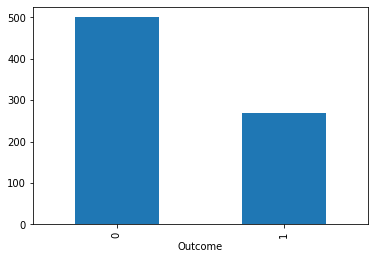

In [49]:
# Showing the class imbalance between Non-diabetic and Diabetic
diabetes_df.pivot_table(index='Outcome', aggfunc='size').plot(kind='bar')

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(diabetes_df, test_size = 0.3, stratify=diabetes_df.Outcome)

<AxesSubplot:xlabel='Outcome'>

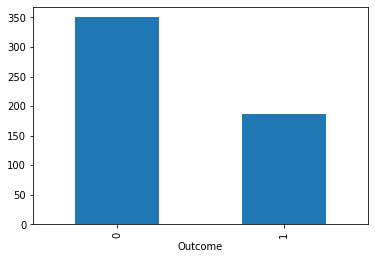

In [51]:
train.pivot_table(index='Outcome', aggfunc='size').plot(kind='bar')

The class distributuion in train is same as input data

<AxesSubplot:xlabel='Outcome'>

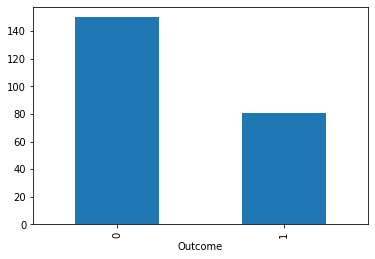

In [52]:
test.pivot_table(index='Outcome', aggfunc='size').plot(kind='bar')

Here also we observe that class distributuion in test is same as input data

In [55]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression(max_iter=1000)

# Fit the logistic regression on the independent variables of the train data with Outcome as dependent variable
my_log_reg.fit(train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], train['Outcome'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [56]:
# plot the confusion matrix to see psoitives and negatives
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['Outcome'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  130 
False positives:  20 
False negatives:  34 
True Positives:  47


In [57]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(test['Outcome'], preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [58]:
# Redoing the Logistic Regression with SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], train['Outcome'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

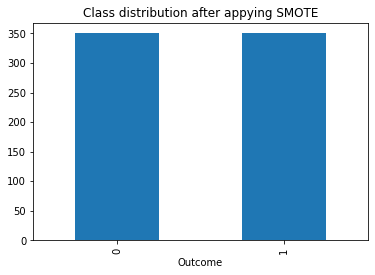

In [59]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Outcome')

Class distribution after appying SMOTE gives the clear picture of increase in number of Diabetic patients.

In [60]:
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression(max_iter=1000)

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [61]:
tn, fp, fn, tp = confusion_matrix(test['Outcome'], preds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  113 
False positives:  37 
False negatives:  24 
True positives:  57


In [62]:

print(classification_report(test['Outcome'], preds2))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       150
           1       0.61      0.70      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



Recall of non-Diabetic went down from 0.87 to 0.75, ther are more non-diabetic individuals that we did not suceed to find.

Recall of Diabetic went up from 0.58 to 0.70 that means we succeeded to identify more diabetic individuals.

Coming to precision of Diabetic went down from 0.70 to 0.61, the cost of correctly identifying more diabetic is that we 
now also incorrectly identify more diabetic(identifying non-diabetic individuals as diabetic while they are actually 
non-diabetic)

2. Create a function called rec_digit_sum that takes in an integer. This function is the recursive sum of all the digits in a number. Given n, take the sum of all the digits in n. If the resulting value has more than one digit, continue calling the function in this way until a single-digit number is produced. The input will be a non-negative integer, and this should work for extremely large values as well as for single-digit inputs. Examples:
16 --> 1 + 6 = 7

942 --> 9 + 4 + 2 = 15 --> 1 + 5 = 6

132189 --> 1 + 3 + 2 + 1 + 8 + 9 = 24 --> 2 + 4 = 6

493193 --> 4 + 9 + 3 + 1 + 9 + 3 = 29 --> 2 + 9 = 11

In [44]:
def rec_digit_sum(n):
    if n < 10:
        return n

    q, r = divmod(n, 10)

    return rec_digit_sum(rec_digit_sum(q) + r)

x = rec_digit_sum(16)
y = rec_digit_sum(942)
z = rec_digit_sum(132189)
a = rec_digit_sum(493193)

print('Recursive sum of 16 is :', x)
print('Recursive sum of 942 is :', y)
print('Recursive sum of 132189 is :', z)
print('Recursive sum of 493193 is :', a)

Recursive sum of 16 is : 7
Recursive sum of 942 is : 6
Recursive sum of 132189 is : 6
Recursive sum of 493193 is : 2
